In [13]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_table('../output/interval/fantom5/andersson2014/180910/unspecified/1-23.processed.tsv.gz')
df.head()

,chrom,start,end,ensembl_id,score,cell_type
0,1,100113535,100114036,ENSG00000162688,0.041209,Unspecified
1,1,100113535,100114036,ENSG00000099260,0.229441,Unspecified
2,1,100138207,100138591,ENSG00000162688,0.112896,Unspecified
3,1,100138207,100138591,ENSG00000099260,0.247009,Unspecified
4,1,100494313,100494735,ENSG00000156875,0.096721,Unspecified


In [4]:
%%sh
gsutil cat gs://genetics-portal-data/lut/gene_dictionary.json | jq -r '[ .gene_id, .start, .chr] | @tsv' > ../tmp/gene_starts.tsv

In [7]:
genes = pd.read_table('gene_starts.tsv',names=['ensembl_id','tss','chr'])

In [10]:
fantom5 = pd.merge(df, genes, on='ensembl_id')
print(fantom5.shape[0])
fantom5.head()
print(sum(fantom5['chrom'] == fantom5['chr']))

57015
57003


In [11]:
fantom5['delta'] = abs(fantom5.tss - (fantom5.start + fantom5.end)/2)
fantom5.head()

,chrom,start,end,ensembl_id,score,cell_type,tss,chr,delta
0,1,100113535,100114036,ENSG00000162688,0.041209,Unspecified,100315640,1,201854.5
1,1,100138207,100138591,ENSG00000162688,0.112896,Unspecified,100315640,1,177241.0
2,1,99935285,99935512,ENSG00000162688,0.152100,Unspecified,100315640,1,380241.5
3,1,100113535,100114036,ENSG00000099260,0.229441,Unspecified,100111499,1,2286.5
4,1,100138207,100138591,ENSG00000099260,0.247009,Unspecified,100111499,1,26900.0


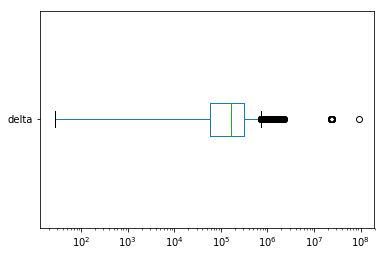

In [16]:
fantom5['delta'].plot(kind='box', vert=False, logx=True)

In [23]:
fantom5['delta'].describe()

count    5.701500e+04
mean     2.050249e+05
std      5.341328e+05
min      2.700000e+01
25%      5.707200e+04
50%      1.637205e+05
75%      3.190350e+05
max      9.316505e+07
Name: delta, dtype: float64